# Figure generation

In [2]:
# define and create the output folder if needed
import os
import sys
dir = r"./generated"
if not os.path.exists(dir):
    os.mkdir(dir)

In [3]:
import numpy as np
import pyvista as pv

# loading pypho
from pypho import target, graphics, camera

# using colorblind friendly settings
graphics.plt.style.use('tableau-colorblind10')

In [25]:
## Un comment this to generate static pyvista output
## for making the output visible in saved notebooks
#graphics.pv.set_jupyter_backend("static")

## NB: to come back to the normal behavior, replace "static" by "trame"

In [26]:
# # Activate Latex writing
# # This is slowing down the graphics dramatically, so only use for final paper rendering
# graphics.plt.rcParams["text.usetex"] = True
# graphics.plt.rcParams["font.family"] = "serif"


In [6]:
# in case the modules need to be reloaded
import importlib
importlib.reload(camera)
importlib.reload(graphics)
importlib.reload(target)

<module 'pypho.target' from 'C:\\Users\\glaurent\\Documents\\Dev\\Projects\\PyPho\\pypho\\target.py'>

## Sharpness zone figures

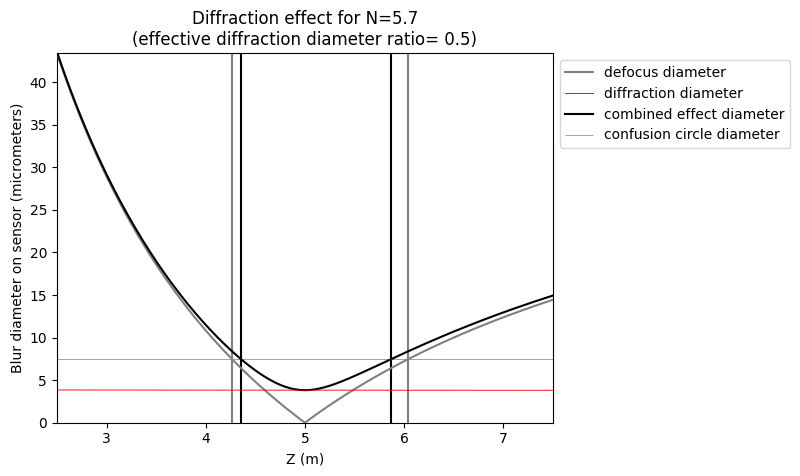

In [7]:
fig = graphics.plot_diffraction_effect(camera.get_default_camera(), Z= 5, N= 5.7, effective_part= 0.5)

In [8]:
fig.savefig(dir+"\\dof_vs_aperture.svg")

0.3


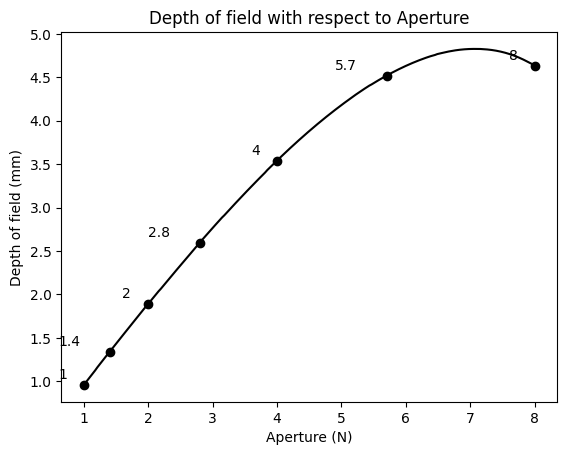

In [9]:
cam = camera.get_default_camera()
fig = graphics.plot_depth_of_field_vs_aperture(cam, effective_diffraction_disk_ratio= 0.5)
print(cam.Z)

In [10]:
fig.savefig(dir+"\\optimal_N.svg")

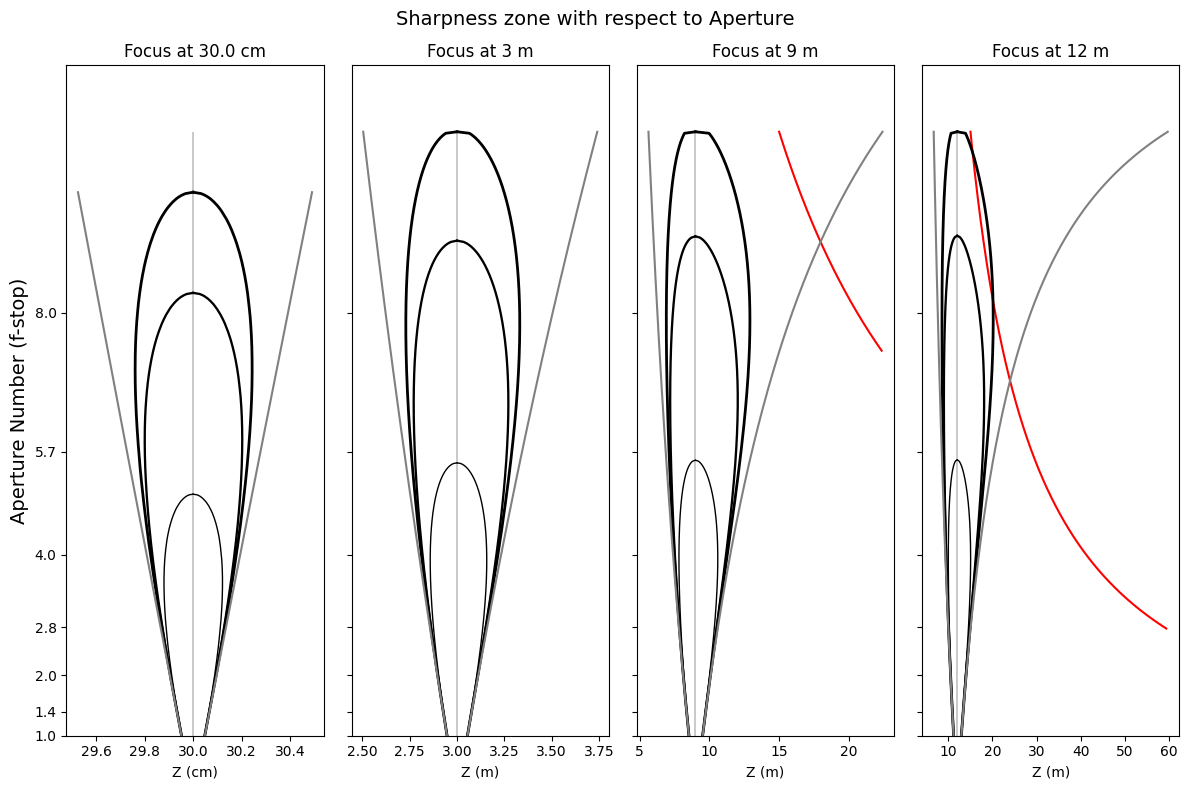

In [11]:
graph = graphics.plot_sharpness_zone_vs_aperture(camera.get_default_camera(),
                                         Z_list=[0.3, 3, 9, 12])

In [12]:
graph.fig.savefig(dir+"\\sharpness_vs_aperture.svg")

C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:496: RuntimeWarning: invalid value encountered in divide
  return (2 * special.jv(1,x)/x)**2


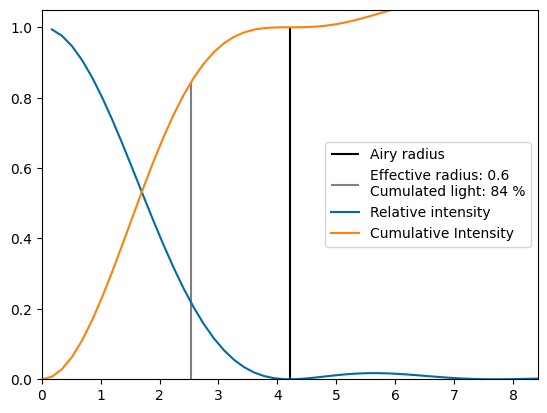

In [13]:
cam = camera.get_default_camera()
fig = graphics.plot_diffraction_intensity_graph(cam)


In [14]:
fig.savefig(dir+"\\diffraction_intensity.svg")

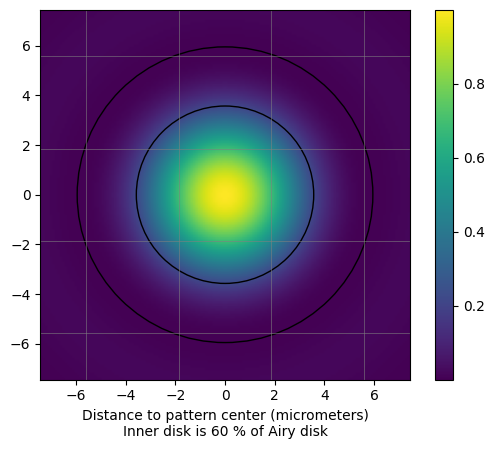

In [15]:
cam = camera.get_default_camera()
cam.update_aperture(8)
fig = graphics.plot_diffraction_pattern(cam, cam.Z)


In [16]:
fig.savefig(dir+"\\diffraction_patter.svg")

# Resolution graphics

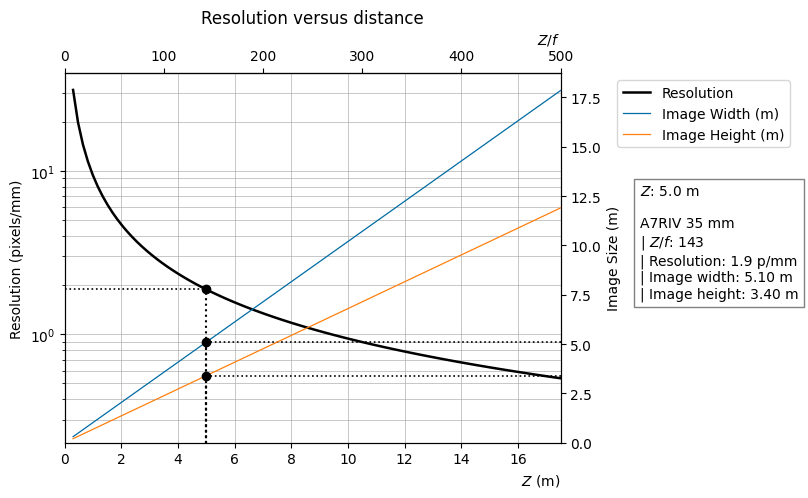

In [17]:
cam = camera.get_default_camera()
graph = graphics.plot_resolution_graph(cam, second_yaxis= "ImageSize", z_ref = 5)

In [18]:
graph.fig.savefig(dir+r"\\resolution_vs_image.svg")

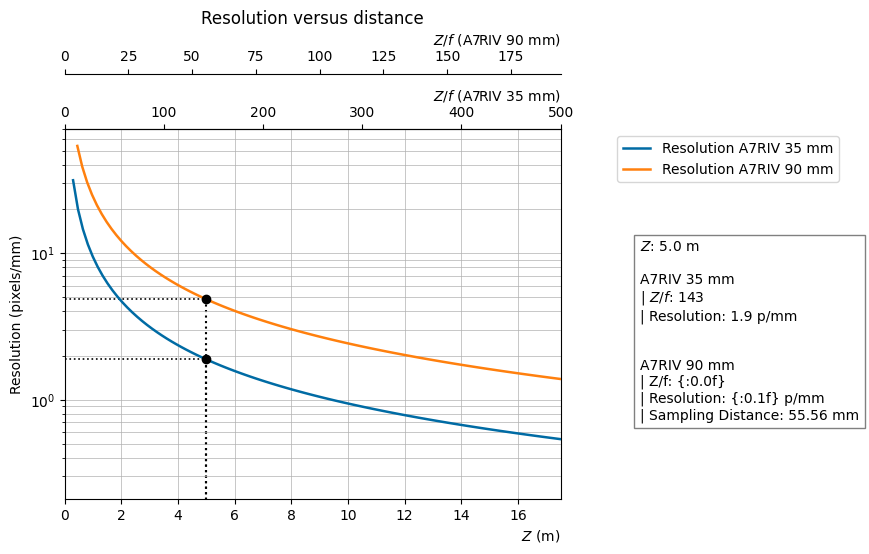

In [19]:
cam = camera.get_default_camera()
cam2 = camera.Camera(cam_id= "A7RIV", focal= 90, min_focus_distance= 0.45)
graph = graphics.plot_resolution_graph(cam, secondary_cam=[cam2], z_ref = 5)

In [20]:
graph.fig.savefig(dir+r"\\resolution.svg")

## Depth precision Graph

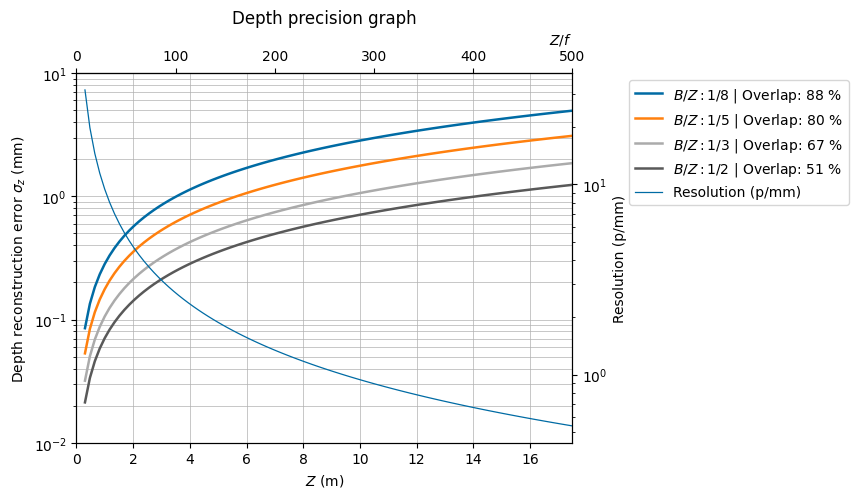

In [21]:
cam = camera.get_default_camera()
graph = graphics.DepthPrecisionGraphVSFocus(cam,
                                     B_Z_ratio= [1/8,1/5,1/3, 1/2],
                                     use_log= True,
                                     rescale_y= True
                                     )
graph.plot()

In [22]:
graph.fig.savefig(dir+r"\\depth_precivion_vs_focus.svg")

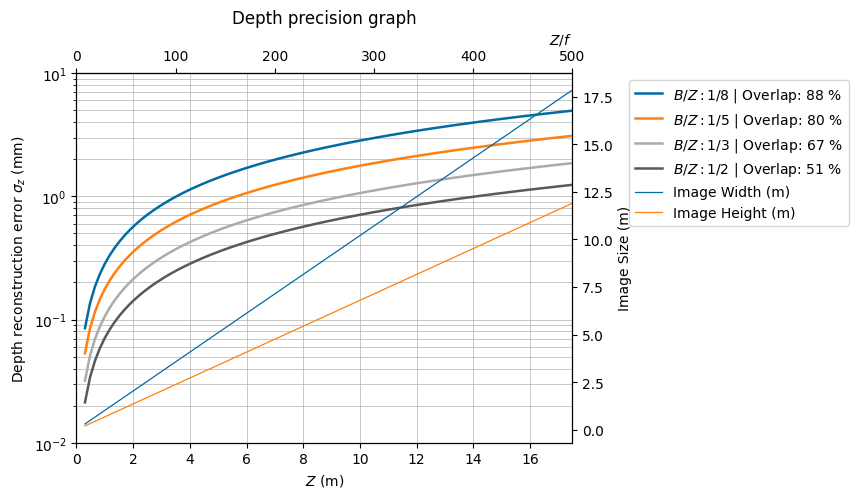

In [23]:
cam = camera.get_default_camera()
graph = graphics.DepthPrecisionGraphVSFocus(cam,
                                     B_Z_ratio= [1/8,1/5,1/3, 1/2],
                                     use_log= True,
                                     rescale_y= True,
                                     second_yaxis= "ImageWidth"
                                     )
graph.plot()

In [24]:
graph.fig.savefig(dir+r"\\depth_precivion_vs_focus.svg")

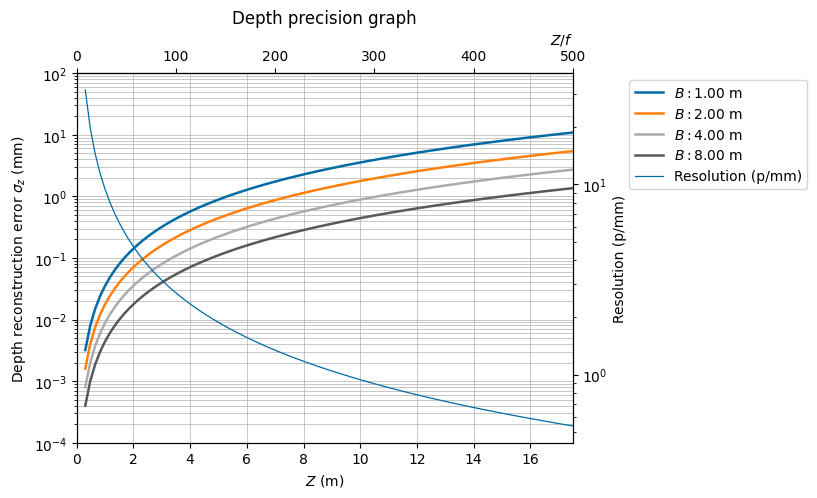

In [25]:
cam = camera.get_default_camera()
graph = graphics.DepthPrecisionGraphVSFocus(cam,
                                     B= [1, 2, 4, 8],
                                     use_log= True,
                                     rescale_y= True
                                     )
graph.plot()

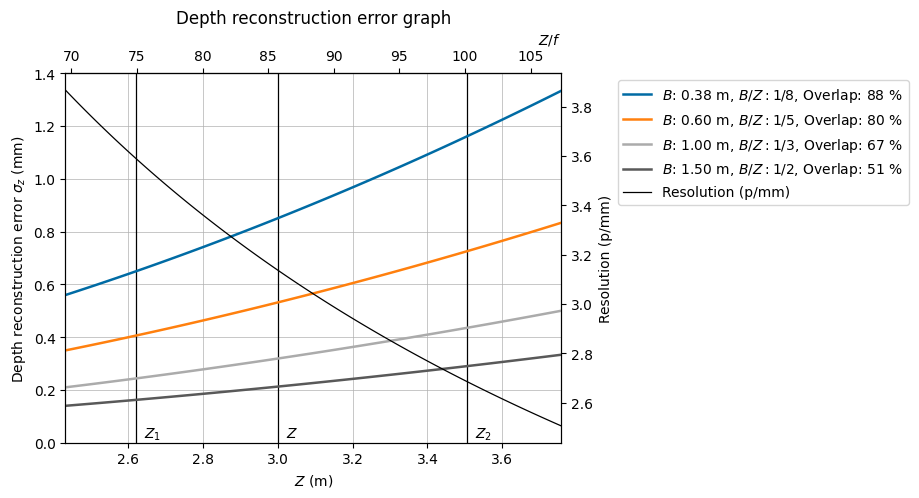

In [26]:
cam = camera.get_default_camera()
cam.update_focus(3)
cam.update_aperture(8)
graph = graphics.DepthPrecisionGraph(cam,
                                     B_Z_ratio= [1/8,1/5,1/3, 1/2],
                                     z_padding_ratio= 0.5,
                                     second_yaxis= "Resolution",
                                     use_log= False
                                     )
graph.plot()

In [27]:
graph.fig.savefig(dir+r"\\depth_precision.svg")

## Pypho demo

In [28]:
# base shape samples
sphere = target.Sphere(radius= 0.25, translation= [0,1,0])
core = target.DrillCore(radius= 0.3, height= 0.5)
cube = target.CubeSample(side_lengths = [0.5, 0.6, 0.25], translation= [1,0,0])

# Pebble
pebble = target.get_pebble_dataset(s = 0.75)
rock_texture = target.get_rock_texture()
pebble.translate([0.8,0.8,0])

# Viewer
viewer = graphics.Viewer3D(objects = [sphere, core, cube])
viewer.show()
viewer.add_object(pebble, texture= rock_texture, update= True)

viewer.plotter.show_grid(axes_ranges=[0, 1, 0, 1, 0, 1])
viewer.plotter.camera.position = (3.1336787277351177, 2.7539673765312314, 1.1000850397563426)
viewer.plotter.camera.focal_point = (0.5611326301853999, 0.4522391147479705, 0.11621837938920856)

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x267d7e3c400_0&reconnect=auto" class="pyvis…

In [29]:
viewer.plotter.save_graphic(dir+"\\target_rock_samples.svg")

In [30]:
outcrop = target.Outcrop(
    width = 5,
    height = 3,
    translation= [2,0,0],
    rotation= [0,10]
)

ground = target.Ground(
    side_lengths = [8,5],
    translation = [-2.1,0,0],
    rotation = None
)

# Viewer
viewer = graphics.Viewer3D(objects = [outcrop, ground])
viewer.show()

viewer.plotter.camera.position = (-5.145301020497831, 11.293331142472608, 5.848709445635152)
viewer.plotter.camera.focal_point = (-1.0898307566569574, -0.5390675172335859, 0.4314481807155682)

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x267d7e3e2c0_1&reconnect=auto" class="pyvis…

In [31]:
viewer.plotter.save_graphic(dir+"\\target_outdoor.svg")

In [32]:
room = target.Room(
    side_lengths = [8,7,3],
    translation = None,
    rotation = None
)

well = target.Well(
    radius = 3,
    height = 1.5,
    translation = [8,0,0],
    rotation = None
)
# Viewer
viewer = graphics.Viewer3D(objects = [room, well])
viewer.show()

viewer.plotter.camera.position = (6.282313712679022, -21.6031520171581, 7.610621254793427)
viewer.plotter.camera.focal_point = (3.3555814490823144, 1.5278961498963335, 1.3252109210809997)

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x267d8176dd0_2&reconnect=auto" class="pyvis…

In [33]:
viewer.plotter.save_graphic(dir+"\\target_indoor.svg")

In [34]:
from pyvista import examples
hills = target.TargetObject(examples.load_random_hills())

# customize scalar bar
sargs = dict(height=0.25, width= 0.05, vertical=True, position_x=0.85, position_y=0.25)

# Viewer
viewer = graphics.Viewer3D(objects = hills, scalar_bar_args= sargs)
viewer.show()

viewer.plotter.camera.position = (35.04852783490205, 53.10461812140392, 13.831437056385063)
viewer.plotter.camera.focal_point = (0.0, 9.99999999999999, 3.8123348355293274)


Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x267d8177520_3&reconnect=auto" class="pyvis…

In [35]:
viewer.plotter.save_graphic(dir+"\\pyvista_object.svg")

# Camera manipulations

In [69]:
obj, cam, viewer= graphics.get_default_scene(obj_size= 0.5)

viewer.plotter.parallel_projection = True
viewer.plotter.camera.position = np.array([0, -0.5, 0])
viewer.plotter.camera.focal_point = viewer.plotter.camera.position + np.array([0,1,0])
viewer.plotter.camera.up = [0,0,1]

viewer.plotter.remove_bounds_axes()

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x2684be6d690_16&reconnect=auto" class="pyvi…

In [38]:
viewer.plotter.save_graphic(dir+"\\move.svg")

In [78]:
cam.update_focal(35, force= True)
cam.optimize_sharpness(mode="front", use_diffraction= True, optimize_N= True)
viewer.set_active_scalars("defocus_diameter", vmin=0,
                    cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= obj, 
                                                            vmin=0,  field= "defocus_diameter")
                )
viewer.update()
viewer.plotter.save_graphic(dir+f"\\focus_update.svg")

In [76]:
cam.update_aperture(8.8)
viewer.set_active_scalars("defocus_diameter", vmin=0,
                    cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= obj, 
                                                            vmin=0,  field= "defocus_diameter")
                )
viewer.update()
viewer.plotter.save_graphic(dir+f"\\aperture_update.svg")

In [77]:
viewer.plotter.save_graphic(dir+f"\\aperture_update.svg")

In [63]:
viewer.plotter.save_graphic(dir+f"\\focus_update.svg")

In [ ]:
cam.update_focal(90, force= True)
cam.update_aperture(22)
viewer.update()


In [68]:

viewer.plotter.save_graphic(dir+f"\\focal_update_90.svg")

In [ ]:
cam.update_focal(18, force= True)
cam.update_aperture()
viewer.update()


In [66]:
viewer.plotter.save_graphic(dir+f"\\focal_update_18.svg")

# Texturing

In [20]:
importlib.reload(camera)

<module 'pypho.camera' from 'C:\\Users\\glaurent\\Documents\\Dev\\Projects\\PyPho\\pypho\\camera.py'>

In [32]:
from pyvista import examples
hills = target.TargetObject(examples.load_random_hills())

# customize scalar bar
sargs = dict(height=0.25, width= 0.05, vertical=True, position_x=0.85, position_y=0.25)

# Viewer
viewer = graphics.Viewer3D(objects = hills, scalar_bar_args= sargs,
                           plot_camera_orientation= True)
viewer.show()

viewer.plotter.camera.position = (35.04852783490205, 53.10461812140392, 20)
viewer.plotter.camera.focal_point = (0.0, 9.99999999999999, 3.8123348355293274)

cam = camera.get_default_camera()
cam.move(10, "up")
cam.attach_target(hills)
cam.orbit(60, hills.center)
cam.move(6, "right")
cam.move(2)
viewer.add_camera(cam)


Widget(value='<iframe src="http://localhost:62665/index.html?ui=P_0x19346491b10_8&reconnect=auto" class="pyvis…

In [33]:
hills.point_data["obliquity"]

pyvista_ndarray([82.66575716, 83.02419528, 83.37585687, ...,         nan,
                         nan,         nan], shape=(10000,))

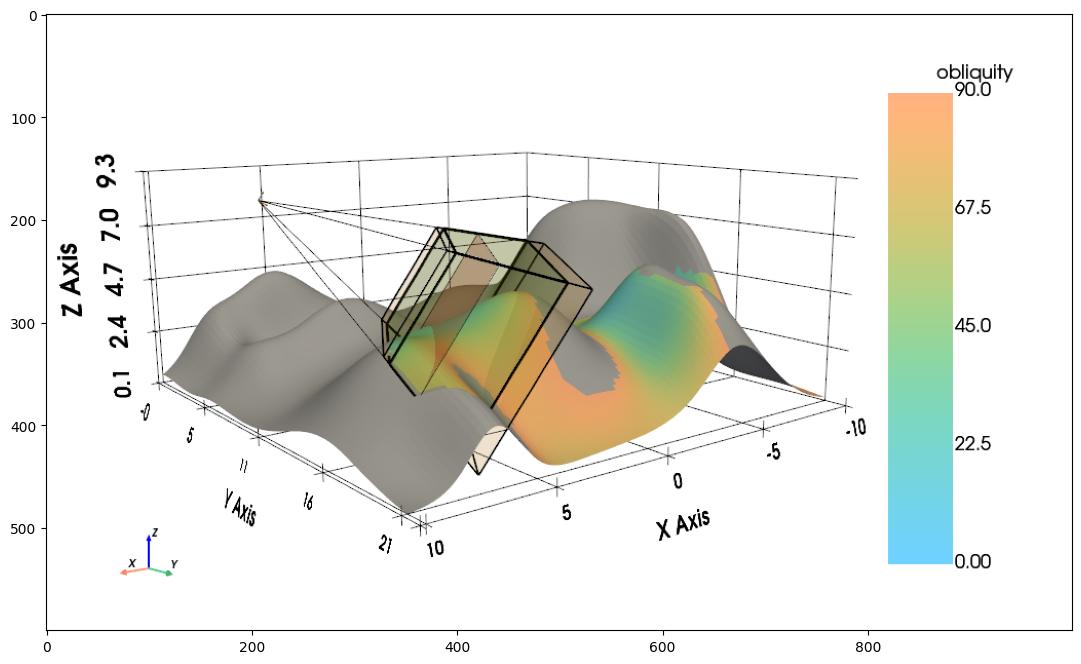

In [35]:
field = "obliquity"
viewer.set_active_scalars(field, vmax= 90, vmin= 0, vertical= True, cmap= "isolum")
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

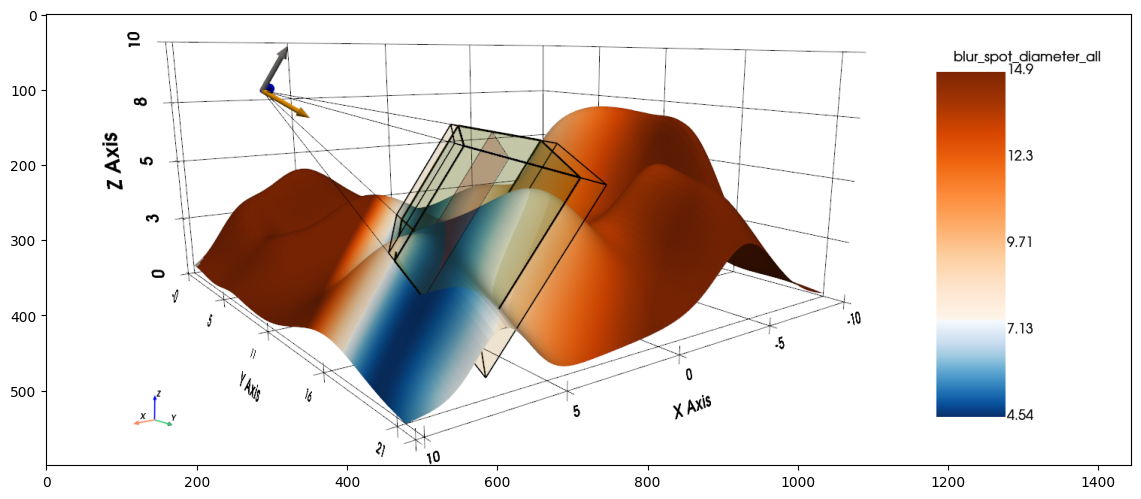

In [143]:
field = "blur_spot_diameter_all"
vmax = 2* cam.confusion_circle_diameter * 1000
viewer.set_active_scalars(field, vmax= vmax, vertical= True,
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= hills, vmax=vmax,
                                                                  field=field)
                )
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

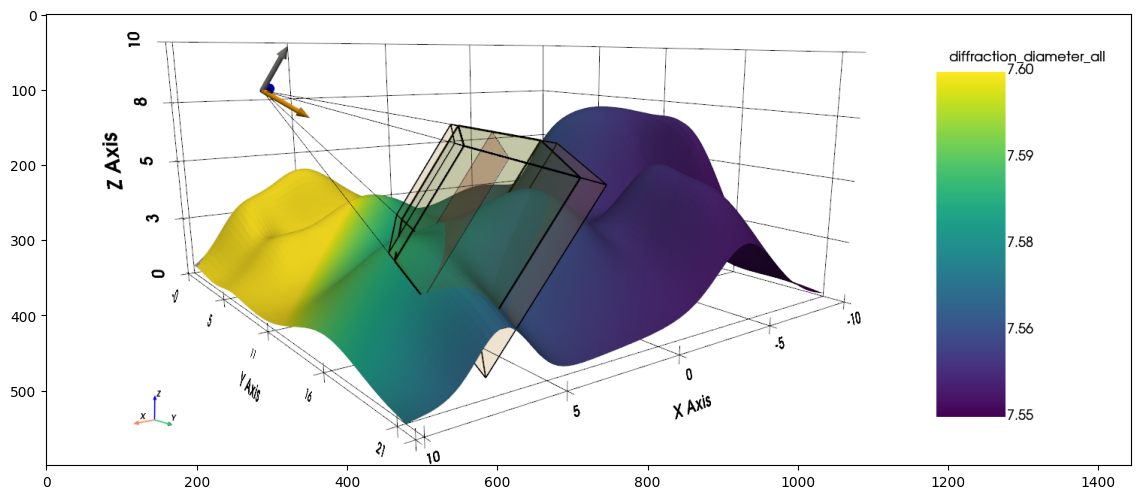

In [144]:
field = "diffraction_diameter_all"
vmax = 2* cam.confusion_circle_diameter * 1000
viewer.set_active_scalars(field, vmax= 7.6, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

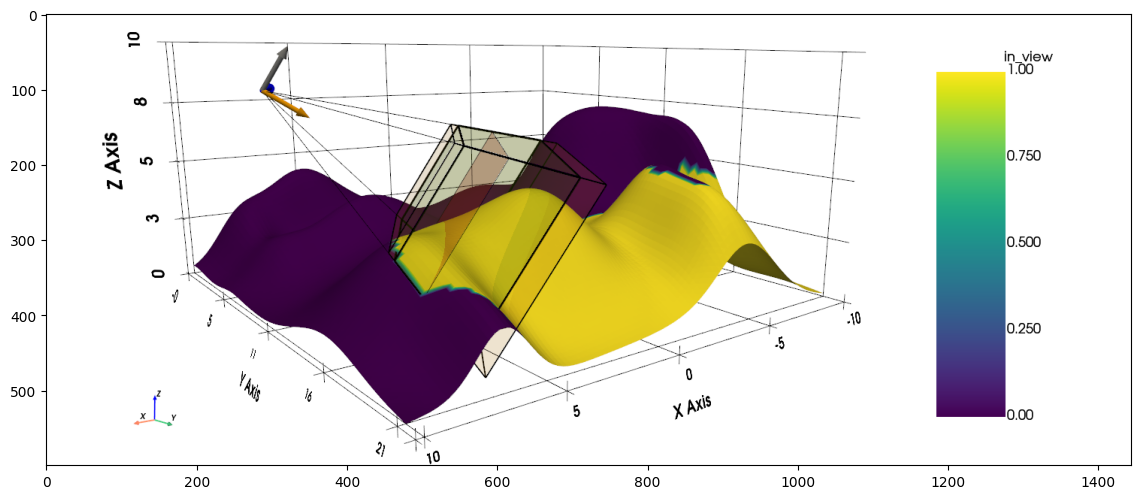

In [145]:
field = "in_view"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

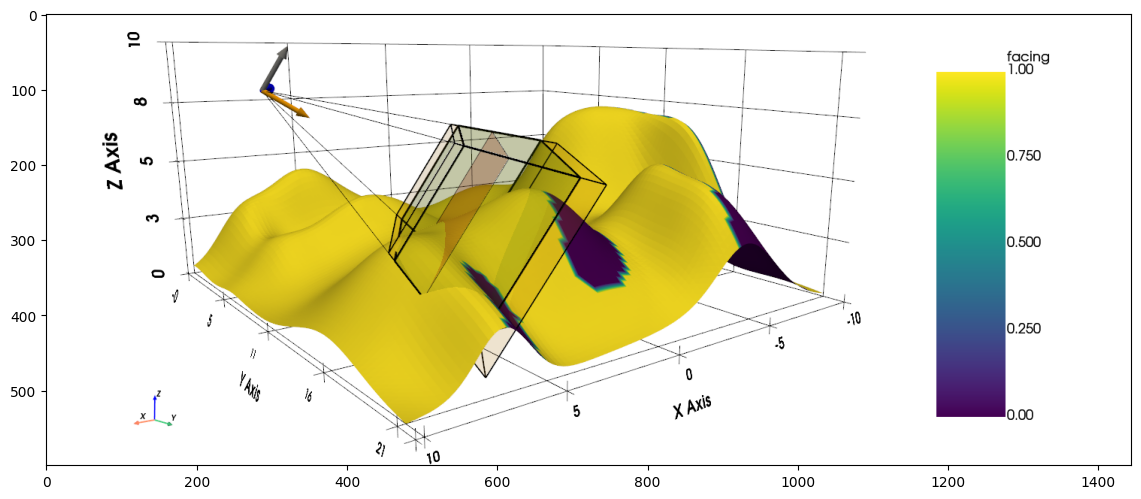

In [146]:
field = "facing"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

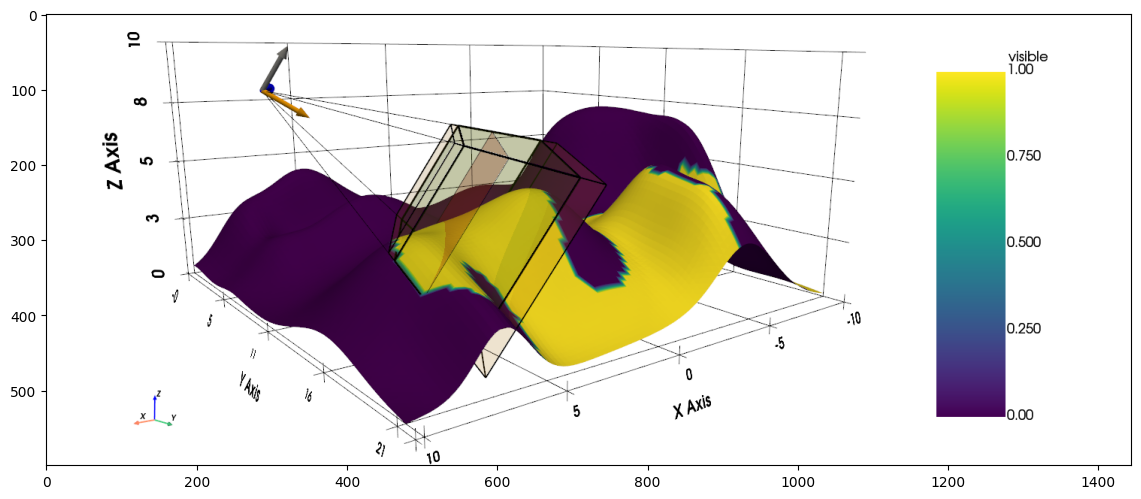

In [147]:
field = "visible"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

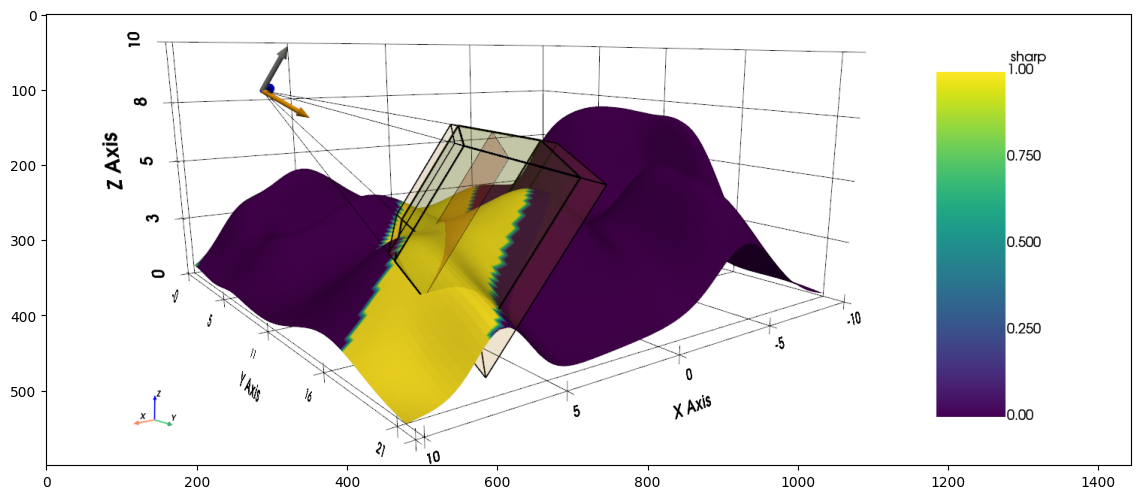

In [148]:
field = "sharp"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

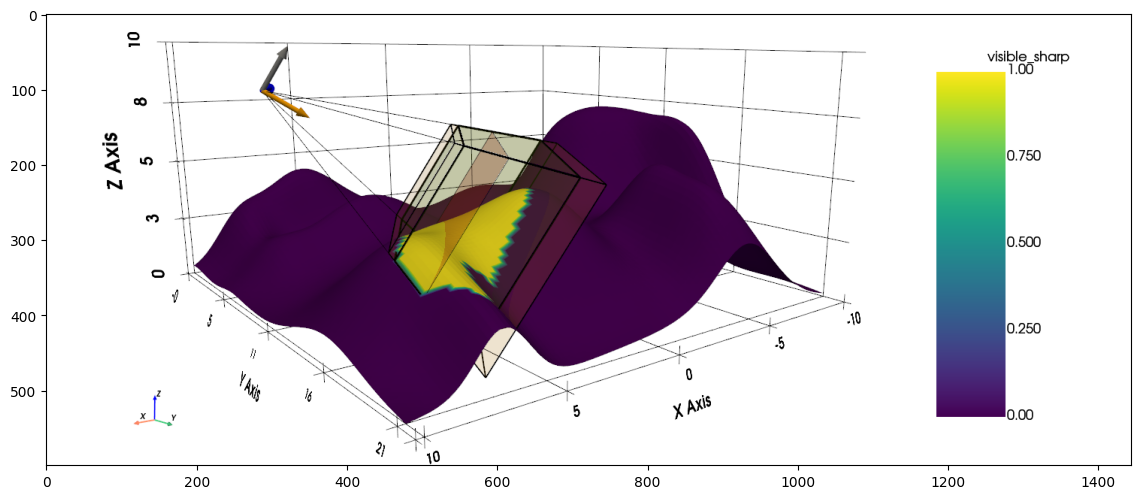

In [149]:
field = "visible_sharp"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

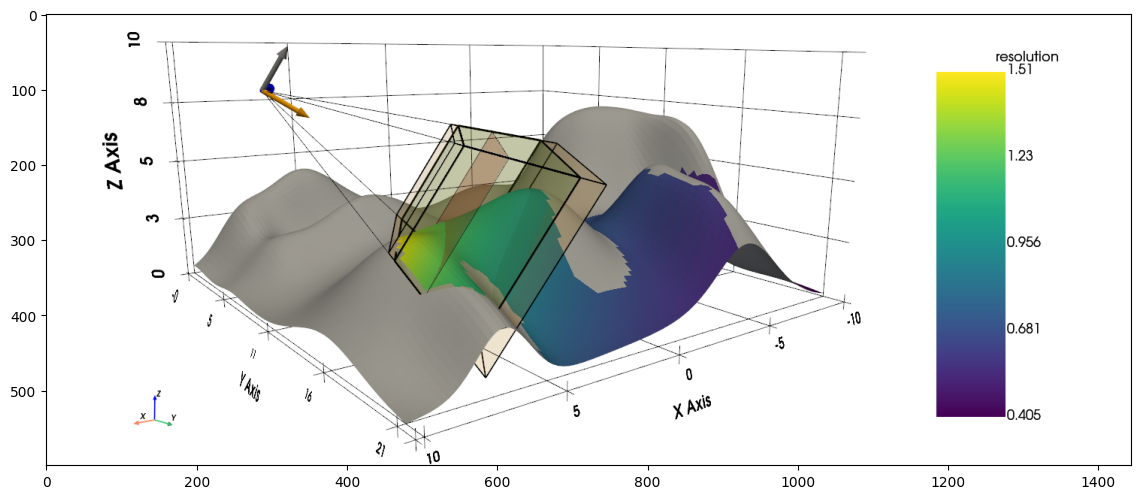

In [150]:
field = "resolution"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

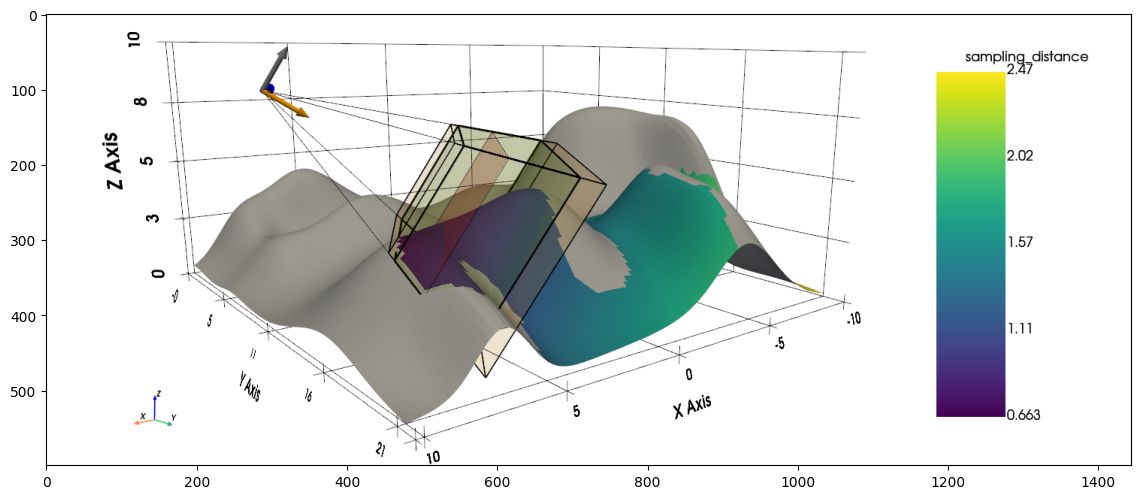

In [151]:
field = "sampling_distance"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

In [160]:
# additional scalar fields when shooting the pictures
cam.trigger()
cam.move(2, "left")
cam.trigger()
cam.move(2, "left")
cam.trigger()

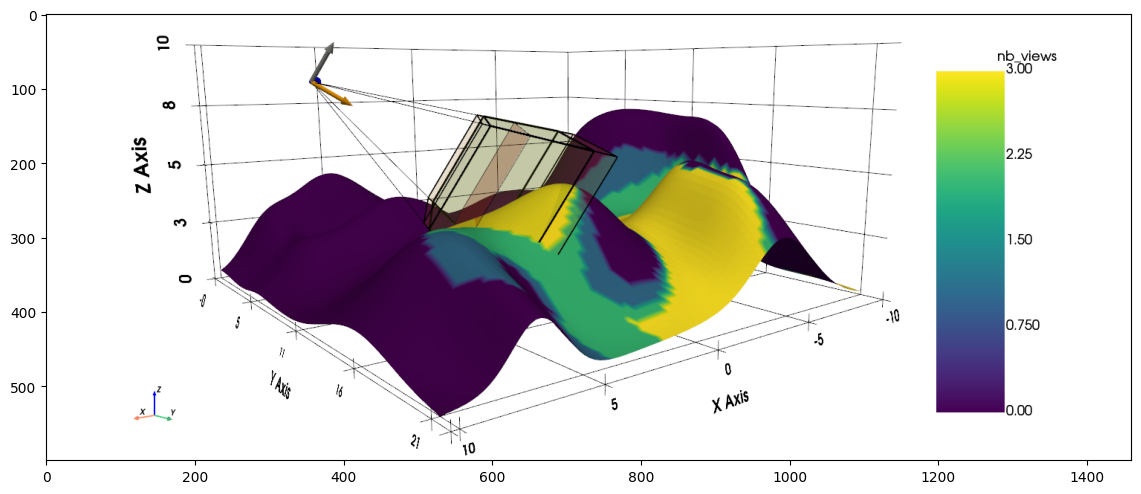

In [161]:
field = "nb_views"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

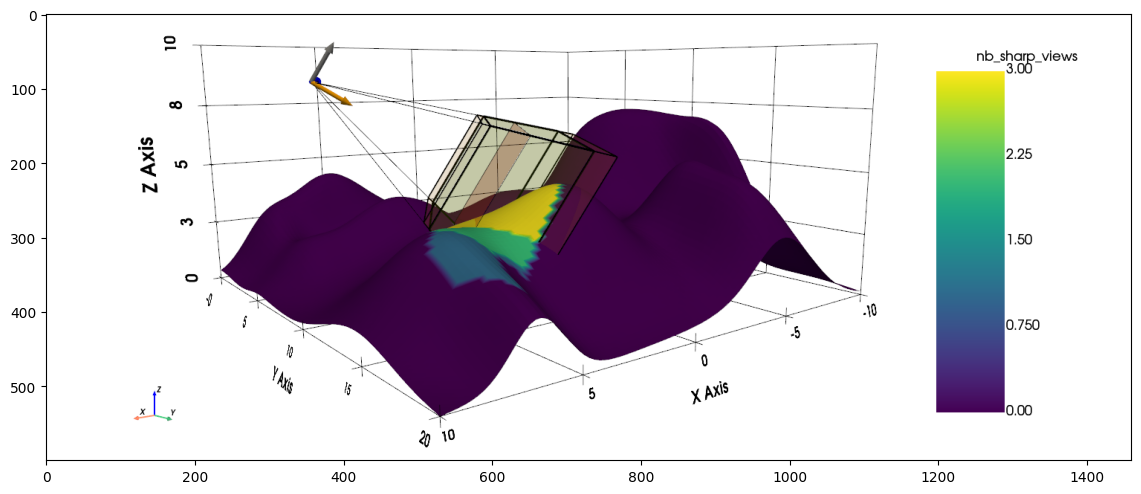

In [163]:
field = "nb_sharp_views"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

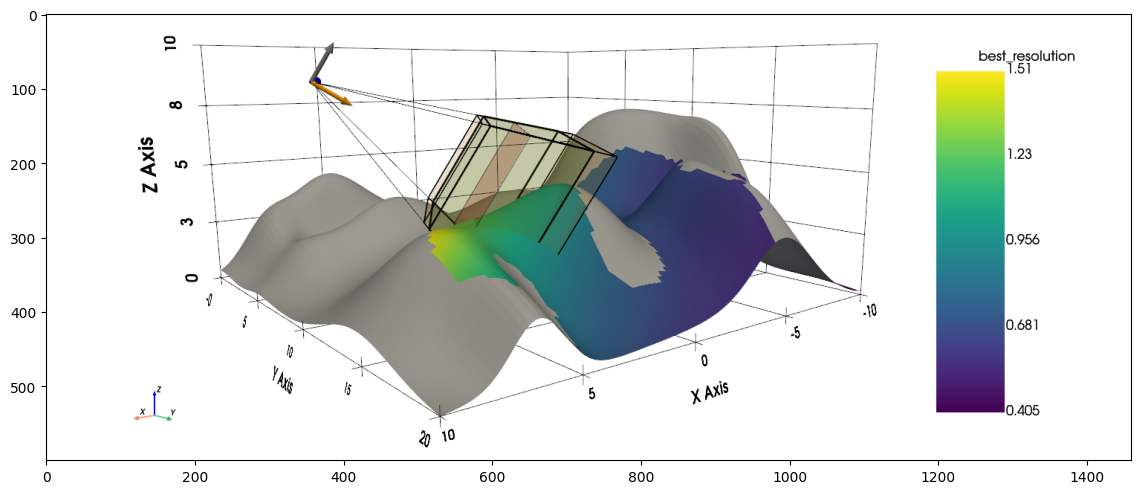

In [164]:
field = "best_resolution"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

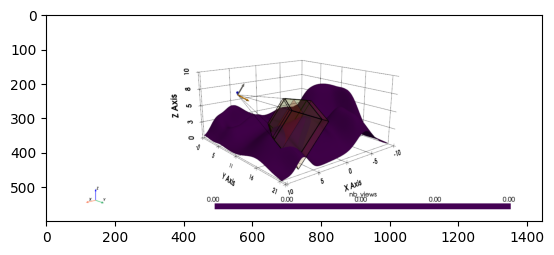

In [106]:
for field in hills.point_data.keys():
    if "diameter" in field and not "diffraction" in field:
        vmax = 2* cam.confusion_circle_diameter * 1000
        viewer.set_active_scalars(field, vmax= vmax,
                    cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= hills, vmax=vmax,
                                                            field=field)
        )
    else:
        viewer.set_active_scalars(field)
    graphics.plt.imshow(viewer.plotter.image)
    graphics.plt.gcf().set_size_inches((14,8))
    graphics.plt.gcf().savefig(dir+f"\\field_auto_{field}.png", dpi=300)

In [162]:
hills

TargetObject (0x2686968b6a0)
  N Cells:    19602
  N Points:   10000
  N Strips:   0
  X Bounds:   -1.000e+01, 1.000e+01
  Y Bounds:   -2.309e-14, 2.000e+01
  Z Bounds:   1.416e-01, 7.483e+00
  N Arrays:   44

# Demos

## Sample

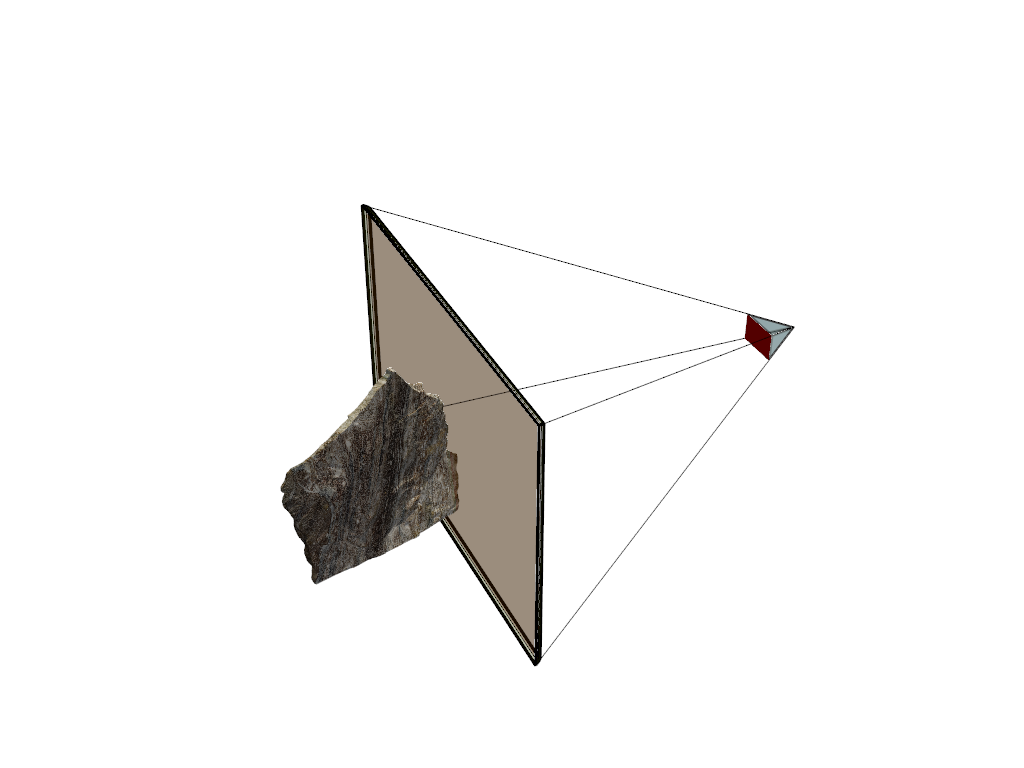

In [ ]:
in_dir = r"..\..\datasets\scheelite"
source = os.path.join(in_dir,"scheelite.obj")
pv_obj = pv.read(source)
obj = target.TargetObject(pv_obj)
texture = pv.read_texture(os.path.join(in_dir,"scheelite.jpg"))

cam = camera.get_default_camera()
cam.init_location(obj)
cam.attach_target(obj)
cam.orbit(-20)
cam.optimize_sharpness(mode= "front", outside_weight= 100)

viewer = graphics.Viewer3D(cameras= cam, objects= obj, target_object_texture= texture)

viewer.show()

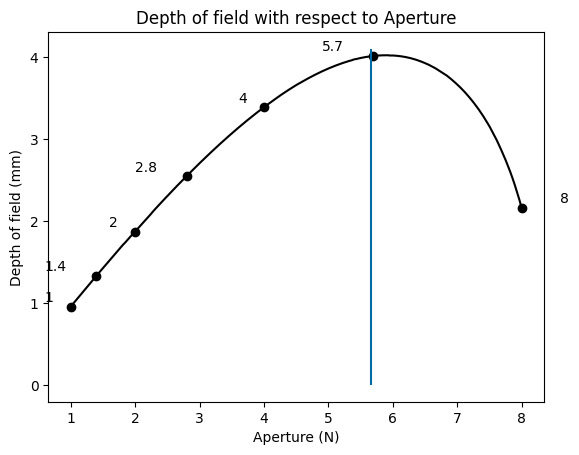

In [168]:
fig = graphics.plot_depth_of_field_vs_aperture(cam.copy())
fig.axes[0].vlines(cam.N, 0,4.1)

In [ ]:
fig.savefig(dir+r"\\case_Scheelite_N.svg")

In [171]:
cam.optimize_sharpness(
        target_points = obj.points,
        mode= "front", outside_weight= 100,
        optimize_location= True, use_diffraction= True)
viewer.update()

In [169]:
cam.Z

np.float64(0.9794900710024658)

In [173]:
field = "blur_spot_diameter"
vmax = 2* cam.confusion_circle_diameter * 1000
viewer.set_active_scalars(field, vmax= vmax, vertical= True,
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= hills, vmax=vmax,
                                                                  field=field)
                )

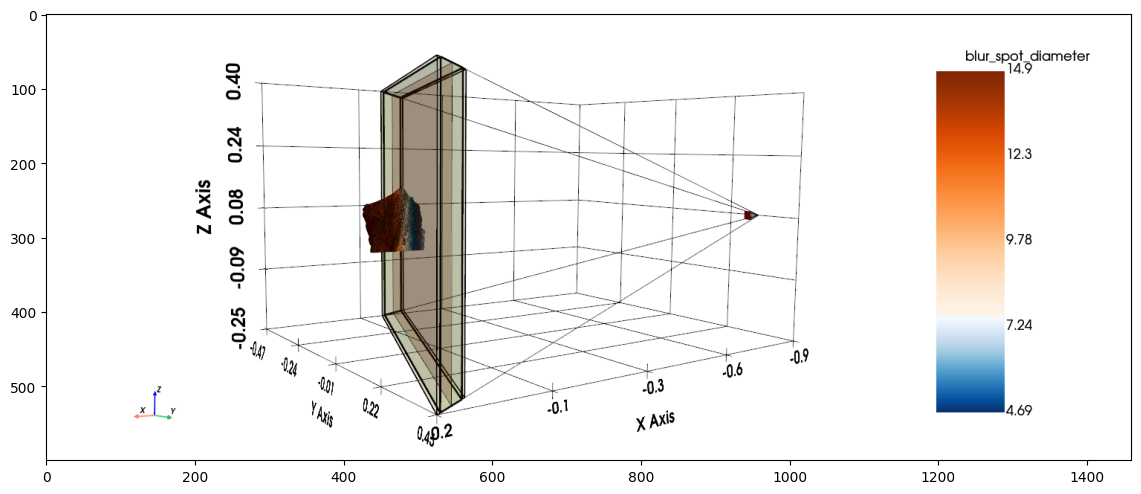

In [174]:

graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\case_scheelite_auto.png", dpi=300)

In [189]:
viewer.show(show_cameras=False, show_objects= True)

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x268d82ceb60_29&reconnect=auto" class="pyvi…

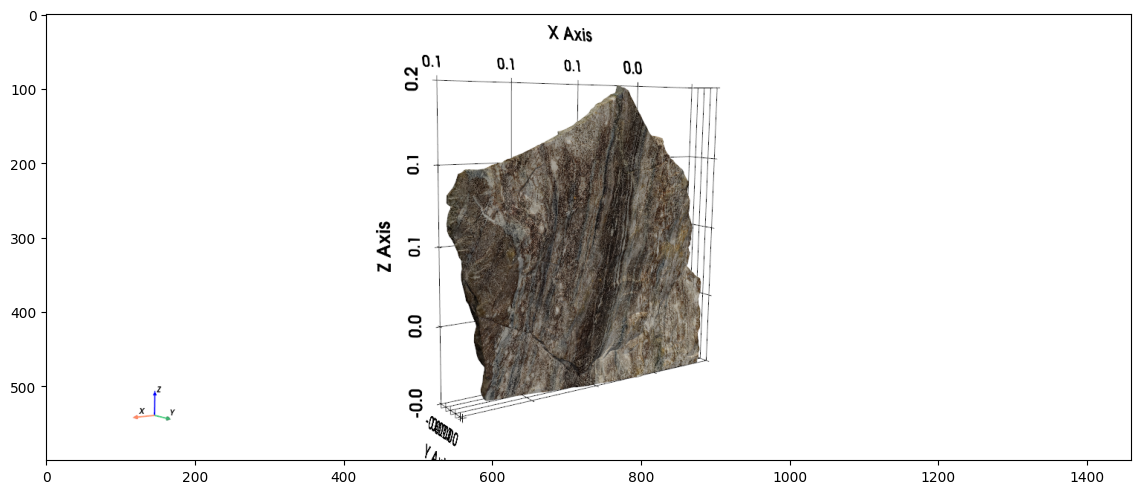

In [190]:

graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\case_scheelite.png", dpi=300)

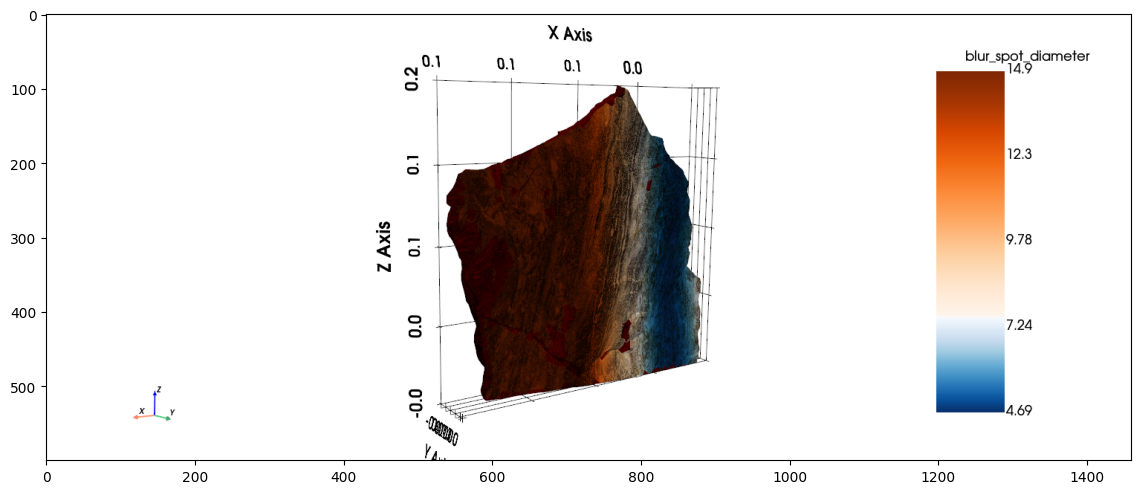

In [191]:
field = "blur_spot_diameter"
vmax = 2* cam.confusion_circle_diameter * 1000
viewer.set_active_scalars(field, vmax= vmax, vertical= True,
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= hills, vmax=vmax,
                                                                  field=field)
                )
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\case_scheelite_colored.png", dpi=300)

## Outcrop

In [32]:
_ = importlib.reload(camera)

In [11]:
dir = r"..\..\datasets\velodrome_1973"
source = os.path.join(dir,"velodrome1973_part_cc44.obj")
pv_obj = pv.read(source)
obj = target.TargetObject(pv_obj, kind= "Ground")
texture = pv.read_texture(os.path.join(dir,"velodrome1973_part_cc44.jpg"))

viewer = graphics.Viewer3D(
   objects= obj, target_object_texture= texture,
    plot_sharpness_object=False,
    plot_sharpness_object_edges=False,
    plot_diffraction_object=False,
    plot_diffraction_object_edges=False
)
viewer.show()


Widget(value='<iframe src="http://localhost:60808/index.html?ui=P_0x2318ba38730_2&reconnect=auto" class="pyvis…

In [12]:
drone = camera.CameraRegistry.get_camera("DJIM3pH", "DJIM3pH")
drone.move_to(obj.center)
drone.move(50, "up")
viewer.add_camera(drone)
viewer.update()

In [13]:

drone.attach_target(obj)
viewer.update()

C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:2019: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  self._update_rotation_from_vectors()
C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:1874: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  self.aim_at(target= target, **kargs)


In [18]:
viewer.set_active_scalars("sampling_distance")

In [24]:
drone.move(10, "backward")
viewer.update()

In [15]:

drone.turn(180,"right")
viewer.update()

C:\Users\glaurent\AppData\Local\Temp\ipykernel_22456\1867856736.py:1: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  drone.turn(180,"right")


In [8]:
dir = r"..\..\..\datasets\velodrome_1973"
source = os.path.join(dir,"velodrome_1973.obj")
pv_obj = pv.read(source)
obj = target.TargetObject(pv_obj, kind= "Ground")
texture = pv.read_texture(os.path.join(dir,"velodrome_1973.jpg"))

cam = camera.get_default_camera()
cam.attach_target(obj, aim=False)
cam.update_view(obj.center)

viewer = graphics.Viewer3D(cameras= cam, objects= obj, target_object_texture= texture,
                           plot_sharpness_object=False,
                           plot_sharpness_object_edges=False
                        )
viewer.show()

# for some reasons init_location must be called after viewer initialisation otherwise the object is not showing
cam.init_location(obj, 250, method= np.max)
viewer.update()

FileNotFoundError: File (C:\Users\glaurent\Documents\Dev\Projects\datasets\velodrome_1973\velodrome_1973.obj) not found

In [90]:
viewer.set_active_scalars("blur_spot_diameter", obj=obj,
                          vmin=0, 
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= obj, vmin=0)
                )

In [89]:
viewer.set_active_scalars("resolution")

In [40]:
obj.point_data["resolution"].max()

np.float64(109.6048061710409)

In [ ]:
viewer.set_active_scalars("nb_sharp_views")

KeyError: 'nb_sharp_views'

In [23]:
viewer.set_active_scalars("best_blur_diameter")

In [ ]:
viewer.set_active_scalars("best_resolution")

## Plug example

In [209]:
obj = target.DrillCore()
cam = camera.get_default_camera()
cam.init_location(obj)
cam.attach_target(obj)
viewer = graphics.Viewer3D(cameras=cam, objects=obj)
viewer.show(show_cameras=False)

cam.optimize_sharpness(mode="middle", optimize_N= True, optimize_location= True)
viewer.update()

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x268f8dec760_38&reconnect=auto" class="pyvi…

In [210]:
n = 12
for i in range(n):
    cam.trigger()
    cam.orbit(360/n)
viewer.add_shot(cam.shots)
viewer.update()

In [213]:
viewer.set_active_scalars("nb_views")